# Introduction

-  Clustering is extensively used in the machine learning 
-  Clustering is also used in finance
    -  to predict equity prices and trading volume
    -  to construct psedo mean-variance frontier
    -  In JPM, they used for "what are the most common signs of market stress?"

- partition observation into k-cluster sets
- more formally
 - partitioning $m$ observations $(x_1, x_2, \cdots, x_m)$, where $x_i$ is $p$-dimentional real vector, into $k \le m$ cluster sets $(c_1, c_2, \cdots, c_k)$ with means 
 $({\bar{m_1}, \bar{m_2}, \cdots, \bar{m_k}})$ such that
 \begin{equation*}
     argmin \sum_{i=1}^{k}\sum_{x \in c_i}||x-\bar{m_i} ||^2
 \end{equation*}


# Usual Procedure in a flow chart

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree: Animal Classification', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.85, "Start", 20);
text(ax, 0.5, 0.66, "Number of Cluster", 20); ##hyperparameter
text(ax, 0.5, 0.5, "Centroid", 20);
text(ax, 0.5, 0.25, "Objects' distance \nto ceteroid", 20);
text(ax, 0.5, 0.0, "Grouping based on \nminimum distance", 20);
text(ax, 0.9, 0.5, "No moving \nin Object", 20);
text(ax, 1.1, 0.5, "End", 20);

ax.annotate('', [0.5, 0.7], [0.5, 0.79],
                     arrowprops=dict(arrowstyle='->', linewidth=1))   
ax.annotate('', [0.5, 0.55], [0.5, 0.615],
                     arrowprops=dict(arrowstyle='->', linewidth=1))  
ax.annotate('', [0.5, 0.33], [0.5, 0.45],
                     arrowprops=dict(arrowstyle='->', linewidth=1))  
ax.annotate('', [0.5, 0.08], [0.5, 0.165],
                     arrowprops=dict(arrowstyle='->', linewidth=1)) 
ax.annotate('',  [0.58, 0.5],[0.7925, 0.5],
                     arrowprops=dict(arrowstyle='->', linewidth=1))  
ax.annotate('',  [0.7925, 0.5], [0.68, 0],
                     arrowprops=dict(arrowstyle='->', linewidth=1)) ; 
##pesudo coding

## EM Algorithm 
-  E-Step: assign points to the nearest cluster center
-  M-Step: set the cluster centers to the mean

# KMeans clustering with artificial data

## usual empirical setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

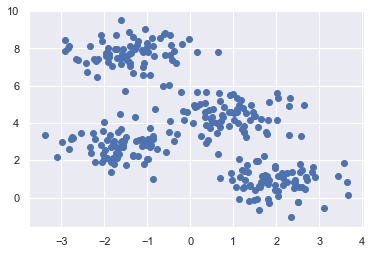

In [3]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(300, centers=4, cluster_std=0.7, random_state=0 )

plt.scatter(X[:,0], X[:, 1])

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans() ##instaciation ##n_cluster=4
kmeans.fit(X)
y_predict = kmeans.predict(X)

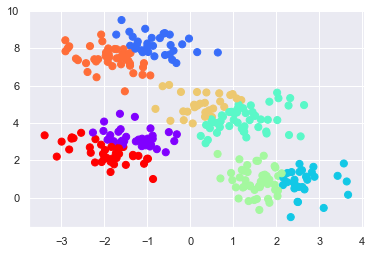

In [7]:
plt.scatter(X[:,0], X[:,1], c=y_predict, s=50, cmap='rainbow') 
##c=color, y_predict=y값애 따라 색을 다르게 하라
##

## visualization of KMeans-clustering: Initialization

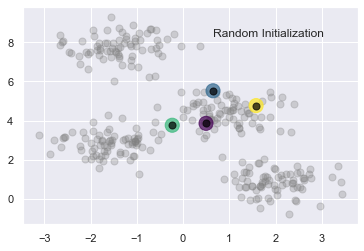

In [8]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

factor = 1
alpha = 0.7

plt.scatter(X[:, 0], X[:, 1], c='grey', cmap='viridis',
               s=50 * factor, alpha=0.3)

plt.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
plt.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)
#plt.text(3.5, 9, "Random Initialization", ha='right', va='top', size=16)
plt.text(0.9, 0.9, "Random Initialization", transform=plt.gca().transAxes, ha='right', va='top');

## visualization of KMeans-clustering: EM 

In [9]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

fig = plt.figure(figsize=(15, 6))
gs = plt.GridSpec(8, 9, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)

for i in range(3):
    ax1 = make_ax(fig, gs[:4,  2 * i:2 + 2 * i])
    ax2 = make_ax(fig, gs[4:, 1 + 2 * i:3 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        #print(centers[i], new_centers[i])
        #print('*************')
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))       
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)
    
##인위적으로 4개의 평균을 지정함
##갈수록 clustering하는 방향으로 이동(조금씩 움직였을 때 더이상 움직일 수 없는 지점에 다다르면 optimization이다)

##clustering의 목적함수 
##K-clustering k개의 평균값을 기준으로 클러스터링 k=hyperparameter=>K-clustering의 단점(우리가 그걸 어케알어?)

NameError: name 'make_ax' is not defined

<Figure size 1080x432 with 0 Axes>

In [ ]:
?pairwise_distances_argmin

## visualization of KMeans-clustering: In Sum

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)



In [ ]:
def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

# A few issues in EM algorithm

## Not globally optimal

In [10]:
##global optimal != local optimal

In [11]:
## The below figure shows the sensitivity of initial random seed number

centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

NameError: name 'find_clusters' is not defined

## Pre-selected number of clusters

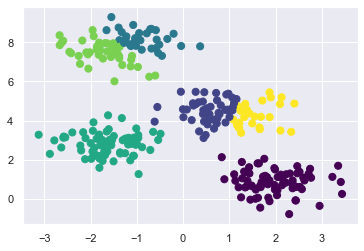

In [13]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## only linear cluster boundaries
-  if data exhibit complicated geometric shape then KMeans-cluster performs poorly

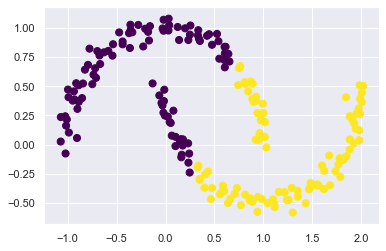

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [15]:
X

array([[ 0.81680544,  0.5216447 ],
       [ 1.61859642, -0.37982927],
       [-0.02126953,  0.27372826],
       [-1.02181041, -0.07543984],
       [ 1.76654633, -0.17069874],
       [ 1.8820287 , -0.04238449],
       [ 0.97481551,  0.20999374],
       [ 0.88798782, -0.48936735],
       [ 0.89865156,  0.36637762],
       [ 1.11638974, -0.53460385],
       [-0.36380036,  0.82790185],
       [ 0.24702417, -0.23856676],
       [ 1.81658658, -0.13088387],
       [ 1.2163905 , -0.40685761],
       [-0.8236696 ,  0.64235178],
       [ 0.98065583,  0.20850838],
       [ 0.54097175,  0.88616823],
       [ 0.348031  , -0.30101351],
       [ 0.35181497,  0.88827765],
       [-0.77708642,  0.82253872],
       [ 1.92590813,  0.01214146],
       [ 0.86096723, -0.47653216],
       [ 0.19990695,  0.99672359],
       [ 1.2895301 , -0.37071087],
       [-0.27847636,  1.02538452],
       [ 0.24187916, -0.07627812],
       [ 1.84988768, -0.09773674],
       [ 1.88406869,  0.0449402 ],
       [ 0.165822  ,

### for non-linear boundaries: use Spectralclustering

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## KMeans is very slow with larger data set
-  similar to curse of dimentionality
-  biggest problem (좋은 컴퓨터가 필요)

In [ ]:
## see ppt ClusterSparcityWithEmpirics.pptx